# CS 663 - Machine Learning Spring, 2024
## Assignment 02 - KMeans

### Goals:
1. Develop your version of K-Means.
2. Compare performance of different implementations.
3. Demonstrate understanding of clustering algorithms like K-Means, DBSCAN, and Hierarchical.
4. Extend functionality of K-Means implementation through additional parameters.



## Problem 2 : Performance Comparison

Test your implementation using scikit-learn's KMeans on generated clusters. 

1. Generate clusters using make_blobs.
2. Compare your implementation's hypotheses with cluster_assignments.
3. Compare your implementation's hypotheses with scikit-learn's KMeans.
4. Report comparisons without using accuracy metric.


## Approach

1. We first import the blob dataset and perform EDA
2. Fit the model with my implementation of KMeans and compare it with blob cluster assignments
3. Fit the model with KMeans of sklearn and compare with my implementation
5. Reported comparisons without using accuracy due to potential misalignment in cluster assignments.


## References

- [Scikit-Learn Documentation: KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  
  Official documentation for the KMeans clustering algorithm in Scikit-Learn.

- [IEEE Xplore Article: SKLearn reference values](https://ieeexplore.ieee.org/document/9260048)  


In [1]:
import sys
sys.path.append("./modules")
from blob_data._blob_data import generate_blob_data
from eda.eda import EDAAnalyzer
from kmeans._kmeans import KMeans as myKMeans
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from cluster_algo.kmeans.kmeans_clustering import KMeansClustering

In [2]:
blob_data, blob_labels = generate_blob_data(n_samples=700, centers=4)

#### EDA

In [3]:
eda_analyzer = EDAAnalyzer(blob_data)
eda_analyzer.display_head()

,x,y
0,-0.841778,7.866552
1,-1.215153,8.014846
2,1.843208,-0.072221
3,-1.352334,7.529442
4,1.773949,-0.423201


In [4]:
eda_analyzer.display_shape()

'Shape of data: rows: 700 cols: 2'

In [5]:
eda_analyzer.describe()

,count,mean,std,min,25%,50%,75%,max
x,700.0,0.049523,1.563046,-3.076582,-1.348944,-0.062378,1.445349,3.673002
y,700.0,3.976439,2.621538,-0.930022,1.908059,3.594433,5.902435,9.421221


#### Univariate Analysis

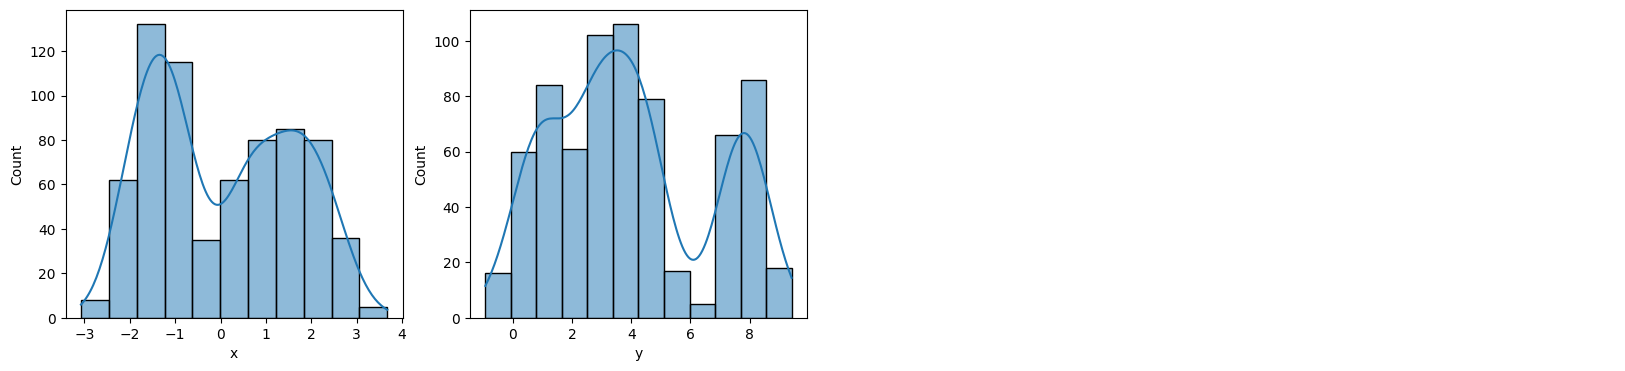

In [6]:
eda_analyzer.plot_histograms()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


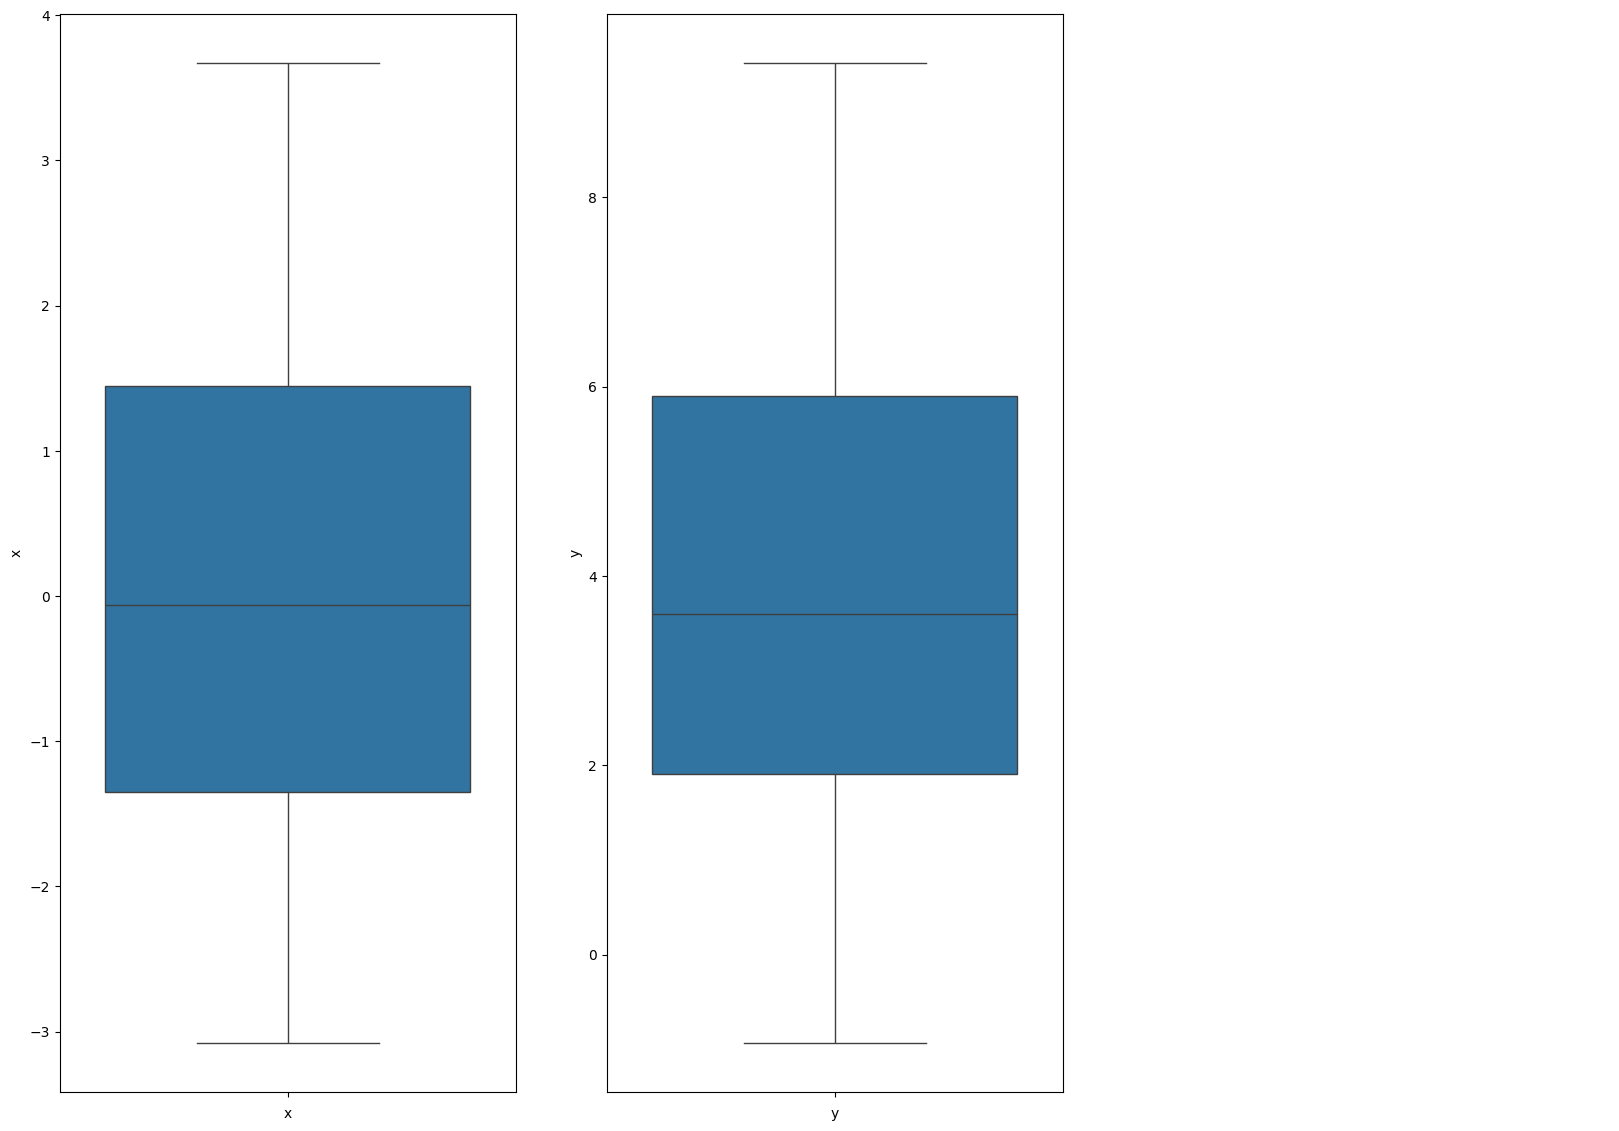

In [7]:
eda_analyzer.get_box_plot()

##### Bivariate Analysis

Number of rows: 1


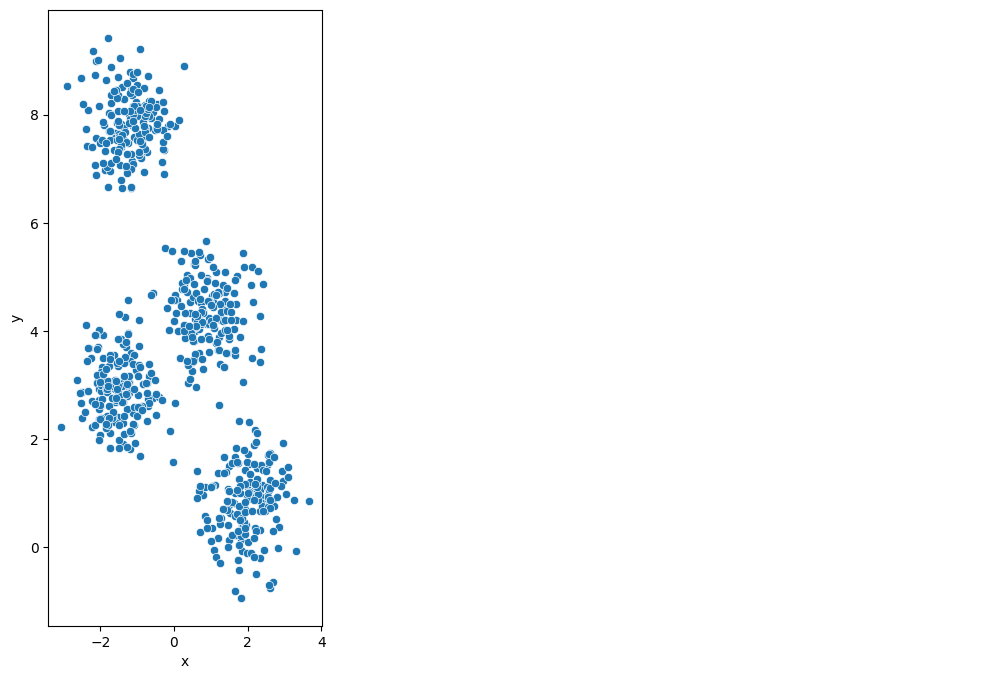

In [8]:
eda_analyzer.get_scatter_plot("y")

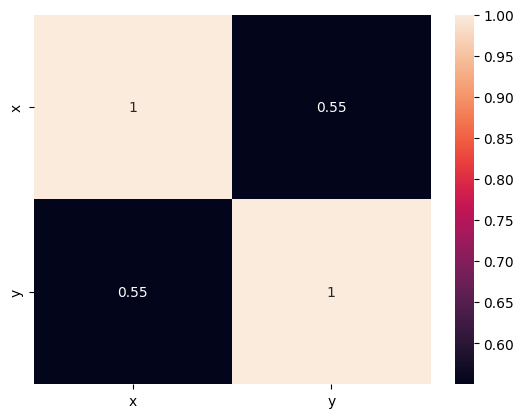

In [9]:
eda_analyzer.get_heat_map()

#### Data quality evaluvation : 

- **Number of Samples**: 700
- **Number of Centers**: 4
- **Data Structure**: Synthetic dataset with 700 samples distributed among 4 clusters.
- **Cluster Separation**: Each cluster has a distinct centroid with a standard deviation of 0.60, indicating some overlap between clusters.
- **Randomness**: Generated with a fixed random state of 0 for reproducibility.


#### Fit Data with my implementation of clustering

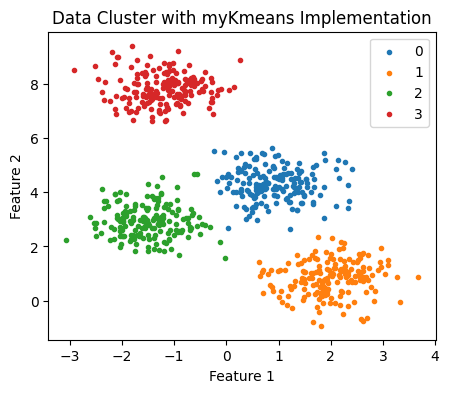

In [10]:
myKMeans = myKMeans(n_clusters=4, max_iter=200)
labels_myKMeans, cluster_centers_myKMeans = myKMeans.fit(blob_data)
myKMeans.plot(blob_data, labels_myKMeans, title="Data Cluster with myKmeans Implementation")

In [11]:
cluster_centers_myKMeans

array([[ 0.55248626,  0.12681642],
       [ 1.24089066, -1.20036455],
       [-0.99079153, -0.40046473],
       [-0.80258538,  1.47401285]])

#### Fit Data with SKLearn clustering - KMeans

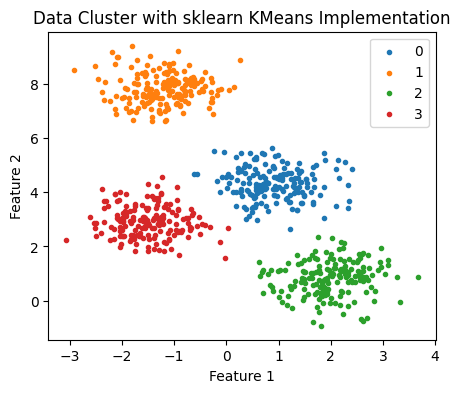

In [12]:
kmeans = KMeans(n_clusters=4, max_iter=200)
labels_sklearn = kmeans.fit_predict(blob_data)
centroids_sklearn = kmeans.cluster_centers_
myKMeans.plot(blob_data, labels_sklearn, title="Data Cluster with sklearn KMeans Implementation")

#### Blob Labels

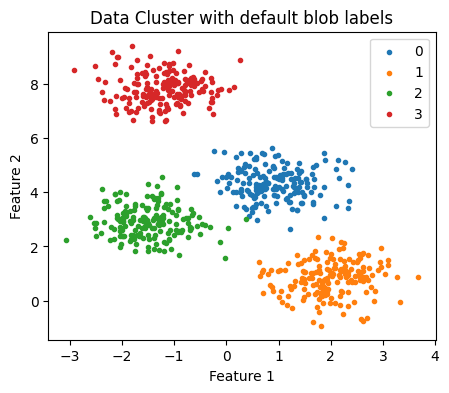

In [13]:
myKMeans.plot(blob_data, blob_labels, title="Data Cluster with default blob labels")

### Performance comparison of different Metrics

### Description of Metrics

1. **Adjusted Rand Index (ARI):** ARI measures the similarity between the true labels and the predicted labels, taking into account all pairs of samples and considering both the cluster assignment and the actual class membership. It ranges from -1 to 1, where 1 indicates perfect labeling agreement and 0 or negative values indicate random labeling.

2. **Silhouette Score:** Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates dense and well-separated clusters.

3. **Completeness Score:** Completeness Score measures the completeness of the clustering result, which means that all data points that are members of a given class are elements of the same cluster. It ranges from 0 to 1, where 1 indicates perfectly complete labeling.

4. **Homogeneity Score:** Homogeneity Score measures the homogeneity of the clustering result, which means that each cluster contains only members of a single class. It ranges from 0 to 1, where 1 indicates perfectly homogeneous labeling.

5. **V-measure Score:** V-measure Score is the harmonic mean of homogeneity and completeness scores, providing a single score that balances both aspects of clustering quality. It ranges from 0 to 1, where 1 indicates perfectly complete and homogeneous labeling.


#### Comparison 1: Custom KMeans Implementation vs. Blob Labels

In [14]:
myKMeans.evaluate_performance(blob_labels)

Adjusted Rand Index: 0.9848711236218626
Silhouette Score: 0.9772742222023353
Completeness Score: 0.9774696268721368
Homogeneity Score: 0.9774696268721368
V-measure Score: 0.9774696268721368


## Clustering Evaluation Metrics Comparison

Below are the clustering evaluation metrics computed for a clustering algorithm:

- Adjusted Rand Index: 0.98
- Silhouette Score: 0.97
- Completeness Score: 0.97
- Homogeneity Score: 0.97
- V-measure Score: 0.97

### Conclusion

In this case, the provided metrics show exceptionally high values, indicating excellent agreement between the true labels and the clustering results.


#### Comparison 2: Custom KMeans Implementation vs. Sklearn

In [15]:
myKMeans.evaluate_performance(labels_sklearn)

Adjusted Rand Index: 0.9886206113717321
Silhouette Score: 0.9786534370894061
Completeness Score: 0.9823790846435635
Homogeneity Score: 0.9823848694986352
V-measure Score: 0.9823819770625832


## Clustering Evaluation Metrics Comparison

Below are the clustering evaluation metrics computed for a clustering algorithm:

- Adjusted Rand Index: 0.98
- Silhouette Score: 0.97
- Completeness Score: 0.98
- Homogeneity Score: 0.98
- V-measure Score: 0.98

### Conclusion

In this case, the provided metrics show exceptionally high values, indicating excellent agreement between the true labels and the clustering results.
